In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [10]:
file_path = r"C:\Users\Trisha\OneDrive\Desktop\YTtrend\data\youtube_trending_cleaned.csv"
df = pd.read_csv(file_path)


In [11]:
# Display basic information
print("Dataset Info:")
print(df.info())
print("\nDataset Head:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Video ID          50 non-null     object
 1   Title             50 non-null     object
 2   Channel           50 non-null     object
 3   Published At      50 non-null     object
 4   Views             50 non-null     int64 
 5   Likes             50 non-null     int64 
 6   Comments          50 non-null     int64 
 7   Tags              50 non-null     object
 8   Engagement Score  50 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 3.6+ KB
None

Dataset Head:
      Video ID                                              Title  \
0  yE560j3AK3A  RETRO - Title Teaser | Suriya | Karthik Subbar...   
1  k49PRtWiZwU  Sunn Mere Dil EP 25 [Eng Sub] Digitally Presen...   
2  NCthQyirLdI  Anaganaga Oka Raju - Pre Wedding Video | Navee...   
3  escVDEc596Q  ROY'S CATERING |

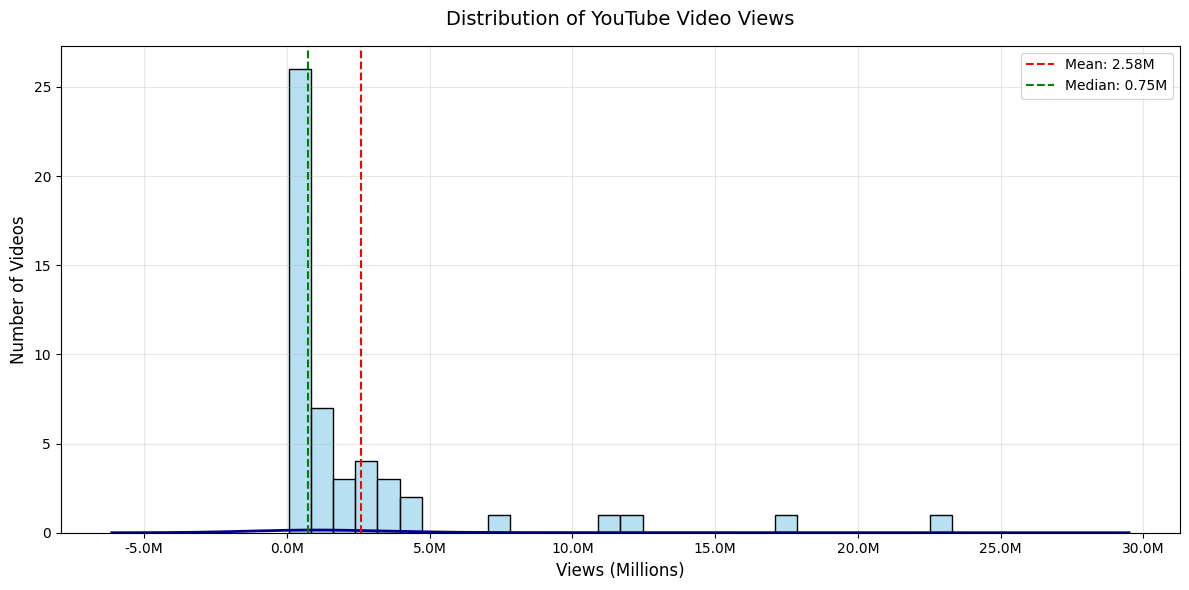

Views Statistics (in millions):
Mean Views: 2.58M
Median Views: 0.75M
Max Views: 23.29M
Min Views: 0.08M


In [13]:
# Create a more readable visualization of views distribution
plt.figure(figsize=(12, 6))

# Convert views to millions for better readability
df['Views_Millions'] = df['Views'] / 1_000_000

# Create histogram with KDE
sns.histplot(data=df, x='Views_Millions', bins=30, color='skyblue', alpha=0.6)
sns.kdeplot(data=df, x='Views_Millions', color='darkblue', linewidth=2)

# Customize the plot
plt.title('Distribution of YouTube Video Views', fontsize=14, pad=15)
plt.xlabel('Views (Millions)', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add mean and median lines
mean_views = df['Views_Millions'].mean()
median_views = df['Views_Millions'].median()

plt.axvline(mean_views, color='red', linestyle='--', label=f'Mean: {mean_views:.2f}M')
plt.axvline(median_views, color='green', linestyle='--', label=f'Median: {median_views:.2f}M')

plt.legend()

# Format axis labels
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}M'))

plt.tight_layout()
plt.show()

# Print some statistical information
print("\
Views Statistics (in millions):")
print(f"Mean Views: {mean_views:.2f}M")
print(f"Median Views: {median_views:.2f}M")
print(f"Max Views: {df['Views_Millions'].max():.2f}M")
print(f"Min Views: {df['Views_Millions'].min():.2f}M")

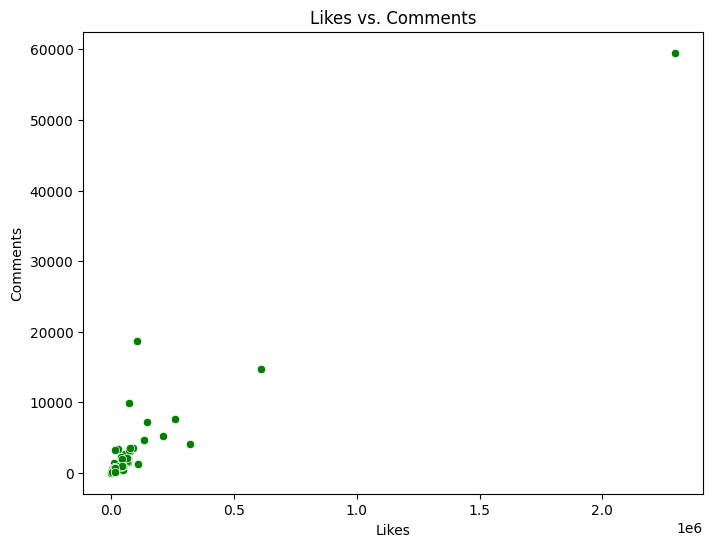

In [14]:
# Likes vs. Comments Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Likes', y='Comments', color='green')
plt.title('Likes vs. Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()


C:\Users\Trisha\AppData\Local\Temp\ipykernel_32588\361262035.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Publish Hour', data=df, palette='viridis')


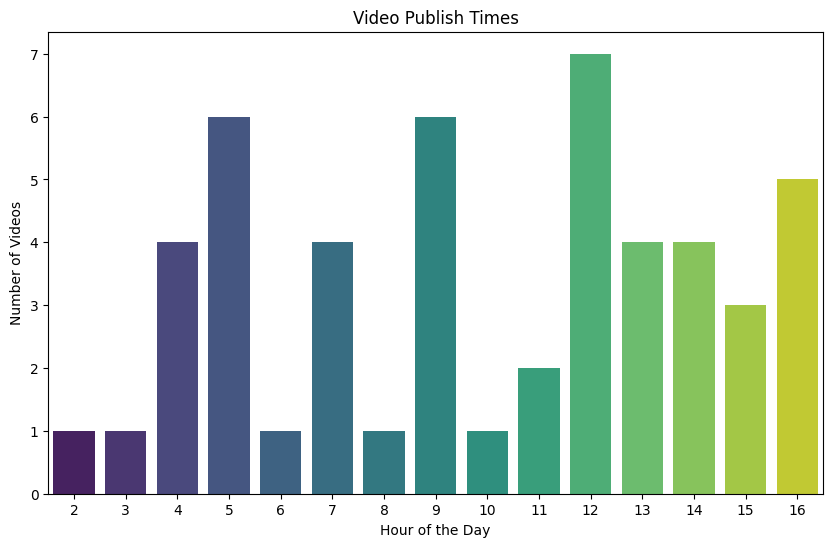

In [15]:
# Publish Time Analysis
df['Publish Hour'] = pd.to_datetime(df['Published At']).dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Publish Hour', data=df, palette='viridis')
plt.title('Video Publish Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos')
plt.show()


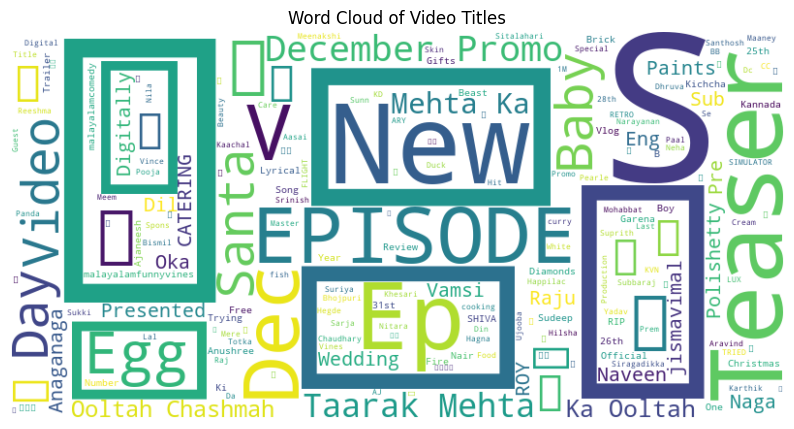

In [16]:
# Word Cloud for Titles
title_text = " ".join(df['Title'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(title_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()


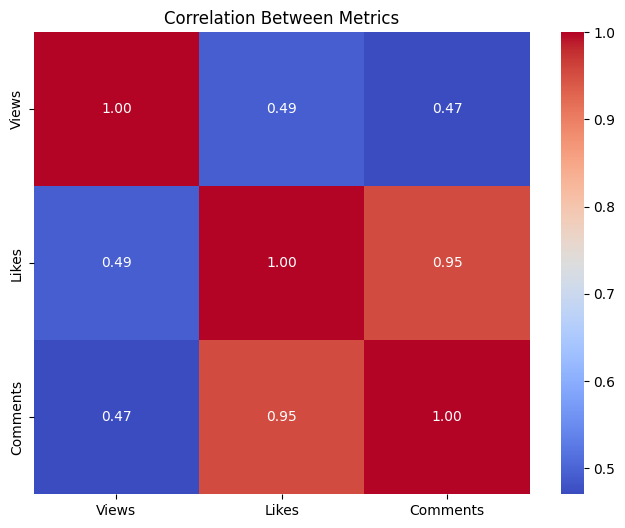

In [17]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Views', 'Likes', 'Comments']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Metrics')
plt.show()
